In [2]:
import yaml
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from src.utils import *

plt.style.use('seaborn')

with open("config.yaml") as f:
    config = yaml.safe_load(f)

In [34]:
def get_all_tracks_features(sp, artist_uri):
    
    albums = get_artist_albums(sp, artist_uri)
    df_albums = (pd
        .DataFrame([get_album_dict(album) for album in albums])
        .rename({'name': 'album_name'}, axis=1)
    )
    
    track_list = []
    for uri in df_albums.album_uri:
        tracks = get_tracks_dict(sp, uri)
        tracks_features = get_clear_tracks_features(sp, tracks)
        df_tracks = (pd
            .DataFrame(tracks)
            .merge(tracks_features, on='track_uri', how='left')
            .rename({'name': 'track_name'}, axis=1)
        )
        track_list.append(df_tracks.copy())
    df_all_tracks = pd.concat(track_list)
    
    return df_albums.merge(df_all_tracks, on='album_uri', how='inner') 

In [35]:
# Use the SpotifyClientCredentials object to authenticate with the Spotify API
client_credentials_manager = SpotifyClientCredentials(
    client_id=config.get('client_id'), 
    client_secret=config.get('client_secret'),
)

sp = spotipy.Spotify(
    client_credentials_manager = SpotifyClientCredentials(
        client_id=config.get('client_id'), 
        client_secret=config.get('client_secret'),
    )
)

In [36]:
_ = pd.read_csv('data/refined/spotify_C.csv').sort_values('name')

In [37]:
_[_.name.str.contains('Cang')]

,artist_uri,name,genres,popularity,followers,is_metal_artist
486,spotify:artist:5n7yJ5lASsCxCesOBM4o28,Cangaço,"['folk metal latinoamericano', 'metal pernambu...",4,1786,True


# Analise por banda
___

In [48]:
df_all_tracks = get_all_tracks_features(sp, 'spotify:artist:5n7yJ5lASsCxCesOBM4o28')
df_all_tracks

,album_uri,album_type,type,album_name,total_tracks,release_date,track_uri,number,track_name,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,spotify:album:2IPLhVs9Vtq7xxdNsRa4EK,album,album,Rastros,9,2012-10-08,spotify:track:7EWJi1k87wDlmzMJLFkJG5,1,Atrito,84458,...,9,-8.695,0,0.0537,0.480000,0.210000,0.2760,0.7660,110.016,4
1,spotify:album:2IPLhVs9Vtq7xxdNsRa4EK,album,album,Rastros,9,2012-10-08,spotify:track:5S18zUTVcsEDgvILhe6XNH,2,Cantar às Excelências das Armas Brancas,244791,...,7,-7.350,1,0.0763,0.003300,0.166000,0.3190,0.2260,110.000,4
2,spotify:album:2IPLhVs9Vtq7xxdNsRa4EK,album,album,Rastros,9,2012-10-08,spotify:track:2vkuVCsJ4jVehZIDPHDI4G,3,Arcabuzado,285125,...,7,-7.591,1,0.1260,0.016200,0.015900,0.7200,0.1600,109.909,3
3,spotify:album:2IPLhVs9Vtq7xxdNsRa4EK,album,album,Rastros,9,2012-10-08,spotify:track:6Ucocd5jHduGhBofocRAgy,4,Bombardeio no Ceará,270937,...,2,-8.641,1,0.0518,0.016300,0.230000,0.1890,0.3290,105.026,4
4,spotify:album:2IPLhVs9Vtq7xxdNsRa4EK,album,album,Rastros,9,2012-10-08,spotify:track:1r234Qw3WF4aIfsbCzplYF,5,Encarnação,266104,...,2,-8.696,1,0.0613,0.056100,0.272000,0.2520,0.3490,105.006,4
5,spotify:album:2IPLhVs9Vtq7xxdNsRa4EK,album,album,Rastros,9,2012-10-08,spotify:track:58dApsO9F4nlxRGBUozhTS,6,Mental,368020,...,5,-9.092,1,0.0497,0.020800,0.904000,0.6150,0.3640,110.180,3
6,spotify:album:2IPLhVs9Vtq7xxdNsRa4EK,album,album,Rastros,9,2012-10-08,spotify:track:6VLbW6WjbiYvXU0jmJg2Qh,7,Statu Variabilis,328714,...,7,-9.027,1,0.0616,0.092100,0.279000,0.1070,0.1480,109.873,4
7,spotify:album:2IPLhVs9Vtq7xxdNsRa4EK,album,album,Rastros,9,2012-10-08,spotify:track:1TqNt8yZqHJ0KVNMiRZakF,8,Corpus Alienum,394375,...,7,-9.552,1,0.0537,0.049200,0.416000,0.1660,0.1970,109.884,4
8,spotify:album:2IPLhVs9Vtq7xxdNsRa4EK,album,album,Rastros,9,2012-10-08,spotify:track:2qSthdI9v5wbUlx8p27A02,9,Devices Of Astral,430750,...,7,-9.598,1,0.0530,0.123000,0.214000,0.2200,0.2220,109.912,4
9,spotify:album:2vQ4S5KxHLLdupbsg9IRVE,single,album,Inevitável,5,2020-06-07,spotify:track:5IvZl6xN95KTdvnoCpfUVd,1,Fati,56374,...,9,-20.332,1,0.0355,0.460000,0.000115,0.1970,0.0828,83.842,4


In [54]:
244791/60000

4.07985

In [ ]:
60000

In [51]:
1000*60

60000

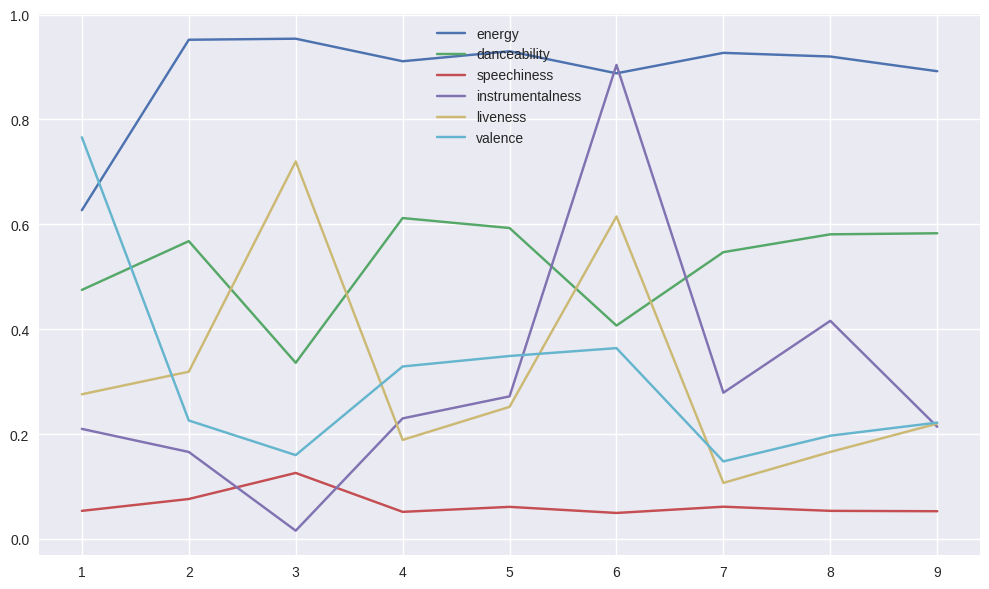

In [10]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(df_album.number, df_album.energy, label='energy')
plt.plot(df_album.number, df_album.danceability, label='danceability')
plt.plot(df_album.number, df_album.speechiness, label='speechiness')
plt.plot(df_album.number, df_album.instrumentalness, label='instrumentalness')
plt.plot(df_album.number, df_album.liveness, label='liveness')
plt.plot(df_album.number, df_album.valence, label='valence')
plt.xticks(df_album.number)
plt.tight_layout()
plt.legend();

In [42]:
tracks_analysis = get_tracks_analysis_dict(sp, tracks)

In [22]:
beats = get_tracks_series(sp, tracks, series_type='sections')

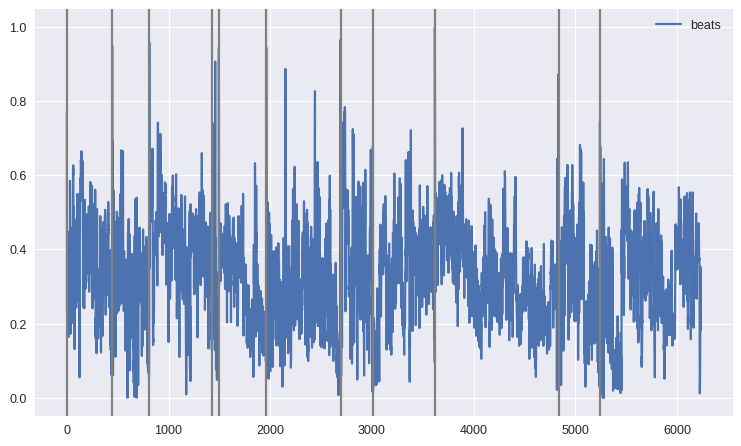

In [20]:
plt.figure(figsize=(10, 6), dpi=90)
plt.plot(beats.index, beats.confidence, label='beats')
for i in beats[beats.track_index == 0].index:
    plt.axvline(i, color = 'gray')
plt.legend();